### Importaci√≥n de datos



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [15]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format


In [18]:
ing_total_tienda1 = tienda['Precio'].sum()
ing_total_tienda2 = tienda2['Precio'].sum()
ing_total_tienda3 = tienda3['Precio'].sum()
ing_total_tienda4 = tienda4['Precio'].sum()

print(f"Ingresos totales de la tienda 1: {ing_total_tienda1}")
print(f"Ingresos totales de la tienda 2: {ing_total_tienda2}")
print(f"Ingresos totales de la tienda 3: {ing_total_tienda3}")
print(f"Ingresos totales de la tienda 4: {ing_total_tienda4}")

Ingresos totales de la tienda 1: 1150880400.0
Ingresos totales de la tienda 2: 1116343500.0
Ingresos totales de la tienda 3: 1098019600.0
Ingresos totales de la tienda 4: 1038375700.0


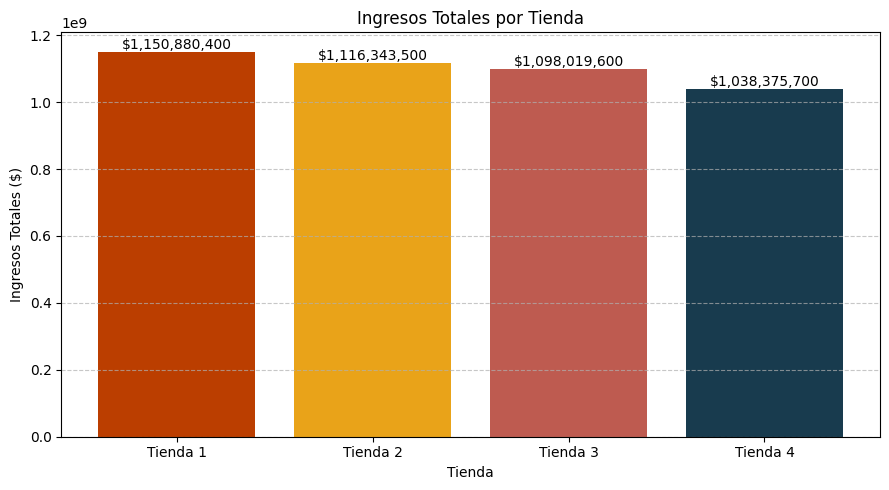

In [20]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ing_total_tienda1, ing_total_tienda2, ing_total_tienda3, ing_total_tienda4]
colores = ['#BB3E00', '#E9A319', '#BE5B50', '#183B4E']  # colores personalizados

plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, ingresos, color=colores)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# A√±adir etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [21]:
# Iterar sobre cada URL y generar una tabla para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  df = pd.read_csv(url)
  suma_por_producto = tienda.groupby('Categor√≠a del Producto')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)

  print(f'Ventas agrupadas por Categor√≠a de la Tienda {nombre}:')
  print(suma_por_producto)
  print('\n')

Ventas agrupadas por Categor√≠a de la Tienda tienda_1:
    Categor√≠a del Producto      Precio
3             Electr√≥nicos 429,493,500
2        Electrodom√©sticos 363,685,200
7                  Muebles 187,633,700
4   Instrumentos musicales  91,299,000
1     Deportes y diversi√≥n  39,290,000
5                 Juguetes  17,995,700
0  Art√≠culos para el hogar  12,698,400
6                   Libros   8,784,900


Ventas agrupadas por Categor√≠a de la Tienda tienda_2:
    Categor√≠a del Producto      Precio
3             Electr√≥nicos 410,831,100
2        Electrodom√©sticos 348,567,800
7                  Muebles 176,426,300
4   Instrumentos musicales 104,990,300
1     Deportes y diversi√≥n  34,744,500
5                 Juguetes  15,945,400
0  Art√≠culos para el hogar  14,746,900
6                   Libros  10,091,200


Ventas agrupadas por Categor√≠a de la Tienda tienda_3:
    Categor√≠a del Producto      Precio
3             Electr√≥nicos 410,775,800
2        Electrodom√©sticos 329,237,900

# 3. Calificaci√≥n promedio de la tienda


     Tienda  Calificaci√≥n Promedio
2  Tienda 3                      4
1  Tienda 2                      4
3  Tienda 4                      4
0  Tienda 1                      4


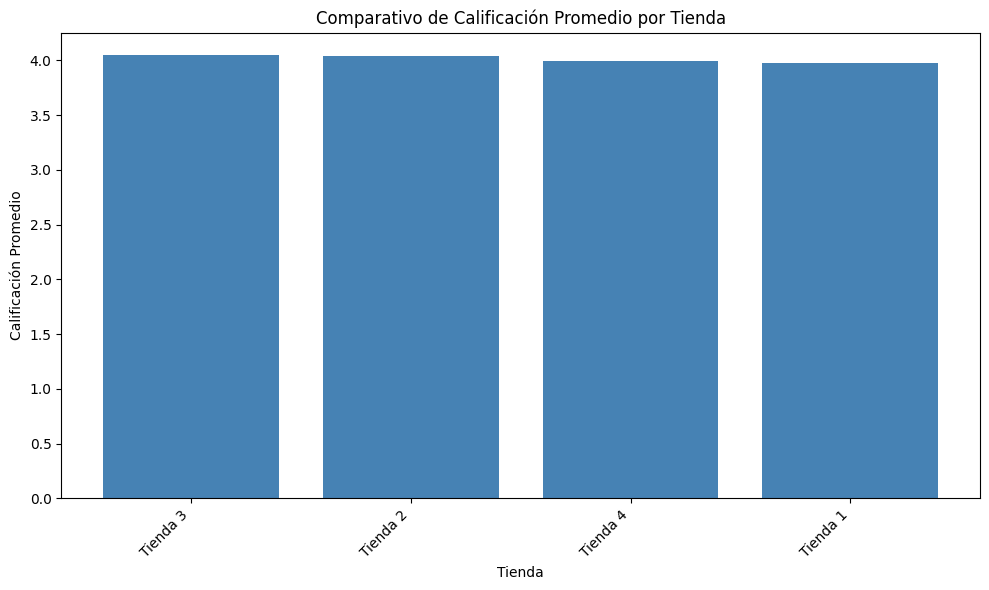

In [22]:
import matplotlib.pyplot as plt

# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {
    'Tienda 1': url,
    'Tienda 2': url2,
    'Tienda 3': url3,
    'Tienda 4': url4
}

# Lista para almacenar resultados
calificaciones_promedio = []

# Iterar por cada tienda y calcular la calificaci√≥n promedio
for nombre, url in urls_tiendas.items():
    df = pd.read_csv(url)
    promedio = df['Calificaci√≥n'].mean()
    calificaciones_promedio.append({'Tienda': nombre, 'Calificaci√≥n Promedio': promedio})

# Crear DataFrame con los resultados y ordenarlo
df_calificaciones = pd.DataFrame(calificaciones_promedio).sort_values(by='Calificaci√≥n Promedio', ascending=False)

# Mostrar tabla
print(df_calificaciones)

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificaci√≥n Promedio'], color='steelblue')
plt.xlabel('Tienda')
plt.ylabel('Calificaci√≥n Promedio')
plt.title('Comparativo de Calificaci√≥n Promedio por Tienda')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Valoracion media por tienda**

In [23]:
# Lista para almacenar los resultados
resultados = []

# Calcular calificaci√≥n promedio por tienda
for nombre_tienda, url in urls_tiendas.items():
    df = pd.read_csv(url)

    # Aseguramos que solo se usen valores v√°lidos
    promedio = df['Calificaci√≥n'].dropna().mean()

    resultados.append({
        'Tienda': nombre_tienda,
        'Calificaci√≥n Promedio': round(promedio, 2)
    })

# Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados).sort_values(by='Calificaci√≥n Promedio', ascending=False)

# Mostrar resultado
print(df_resultados)

     Tienda  Calificaci√≥n Promedio
2  Tienda 3                      4
1  Tienda 2                      4
3  Tienda 4                      4
0  Tienda 1                      4


# 4. Productos m√°s y menos vendidos


üõí Top 5 productos m√°s vendidos en Tienda 1:
        Producto     Precio
0      Iphone 15 96,697,500
1  TV LED UHD 4K 90,295,300
2       Smart TV 82,790,400
3   Refrigerador 75,271,900
4    Tablet ABXY 56,723,100


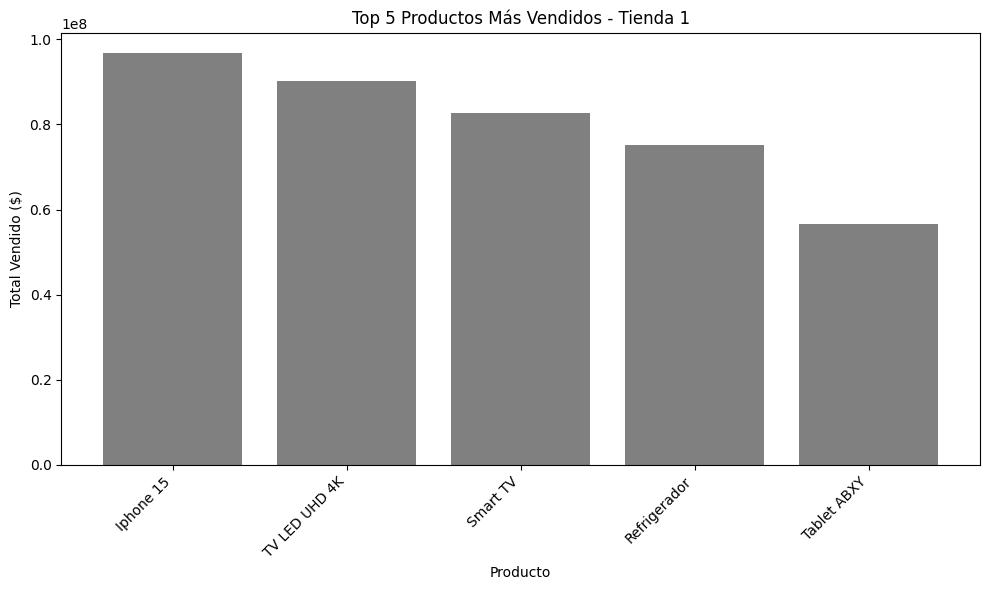


üõí Top 5 productos m√°s vendidos en Tienda 2:
           Producto      Precio
0         Iphone 15 113,225,800
1     TV LED UHD 4K 103,375,000
2      Refrigerador  97,632,500
3  Lavadora de ropa  66,762,300
4          Smart TV  61,142,000


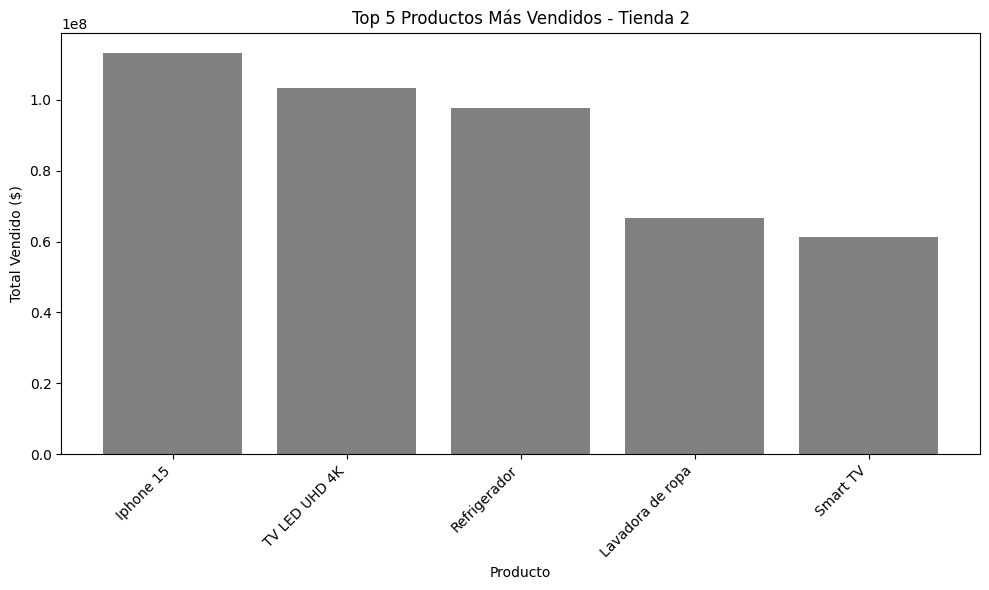


üõí Top 5 productos m√°s vendidos en Tienda 3:
        Producto     Precio
0   Refrigerador 99,889,700
1  TV LED UHD 4K 96,669,100
2      Iphone 15 93,225,700
3       Smart TV 78,837,300
4   Lavavajillas 64,364,800


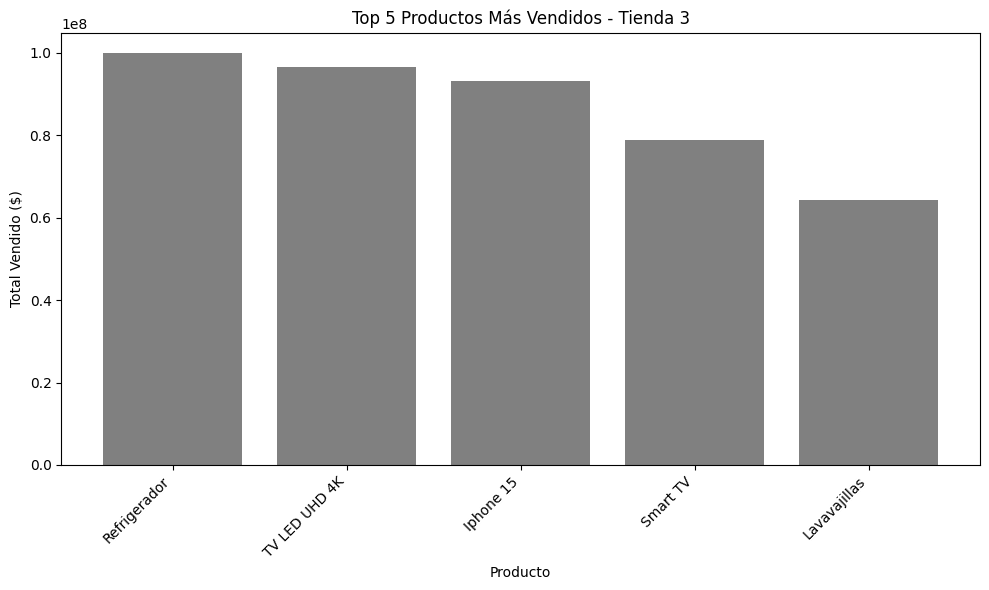


üõí Top 5 productos m√°s vendidos en Tienda 4:
        Producto     Precio
0      Iphone 15 96,697,500
1  TV LED UHD 4K 90,295,300
2       Smart TV 82,790,400
3   Refrigerador 75,271,900
4    Tablet ABXY 56,723,100


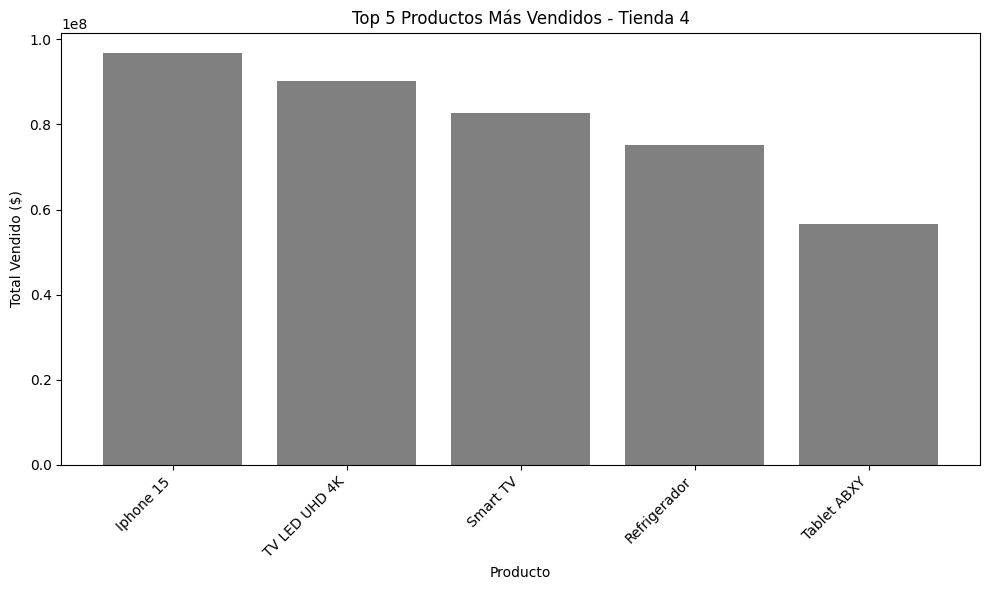

In [29]:
import matplotlib.pyplot as plt

# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {
    'Tienda 1': url,
    'Tienda 2': url2,
    'Tienda 3': url3,
    'Tienda 4': url4
}

# Iterar sobre cada tienda y generar top 5 productos m√°s vendidos
for nombre_tienda, url in urls_tiendas.items():
    # Leer los datos
    df = pd.read_csv(url)

    # Agrupar por producto y sumar el total vendido (por precio)
    top_5 = (
        df.groupby('Producto')['Precio']
        .sum()
        .nlargest(5)
        .reset_index()
    )

    # Mostrar tabla
    print(f"\nüõí Top 5 productos m√°s vendidos en {nombre_tienda}:")
    print(top_5)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(top_5['Producto'], top_5['Precio'], color='grey')
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido ($)')
    plt.title(f'Top 5 Productos M√°s Vendidos - {nombre_tienda}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Env√≠o promedio por tienda

     Tienda  Costo Env√≠o Promedio
1  Tienda 2                25,216
2  Tienda 3                24,806
0  Tienda 1                23,459
3  Tienda 4                23,459


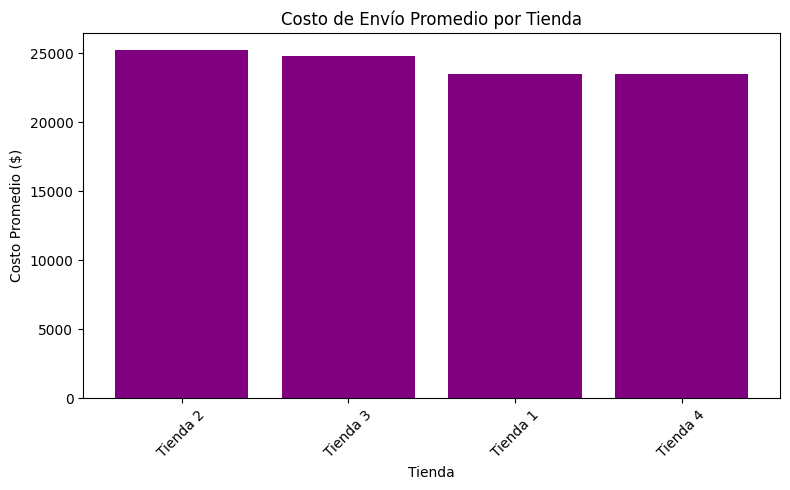

In [33]:
import matplotlib.pyplot as plt

# Lista para almacenar los resultados
costos_envio = []

# Iterar sobre cada tienda y calcular promedio del costo de env√≠o
for nombre_tienda, url in urls_tiendas.items():
    df = pd.read_csv(url)

    # Aseguramos que no hayan valores nulos
    promedio_envio = df['Costo de env√≠o'].dropna().mean()

    costos_envio.append({
        'Tienda': nombre_tienda,
        'Costo Env√≠o Promedio': round(promedio_envio, 2)
    })

# Crear DataFrame con los resultados
df_envio = pd.DataFrame(costos_envio).sort_values(by='Costo Env√≠o Promedio', ascending=False)

# Mostrar resultados
print(df_envio)


plt.figure(figsize=(8, 5))
plt.bar(df_envio['Tienda'], df_envio['Costo Env√≠o Promedio'], color='purple')
plt.title('Costo de Env√≠o Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Relacion entre precio y** **calificacion**

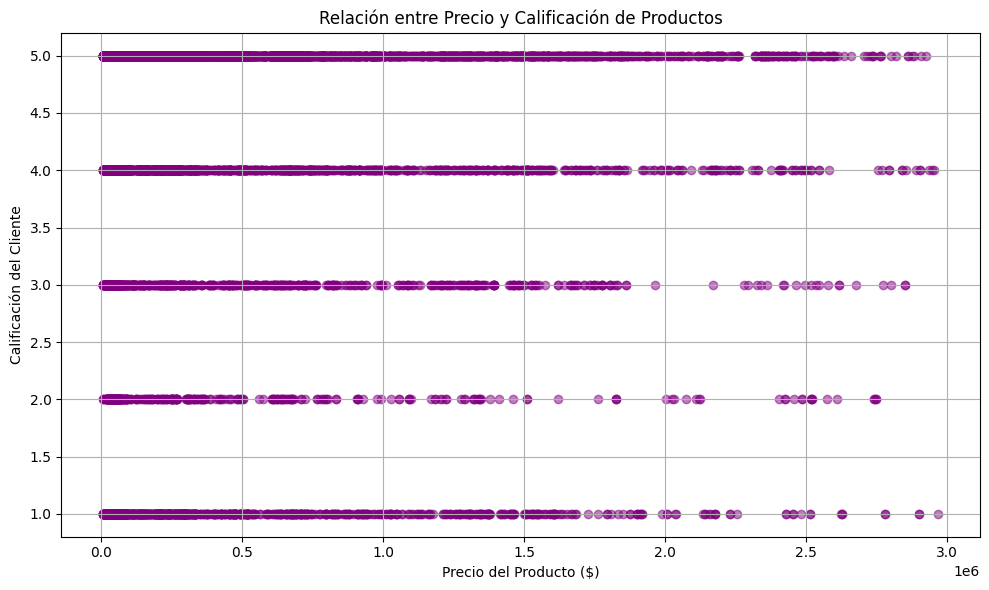

In [34]:
# Combinar los datos de todas las tiendas
df_total = pd.concat([pd.read_csv(url).assign(Tienda='Tienda 1'),
                      pd.read_csv(url2).assign(Tienda='Tienda 2'),
                      pd.read_csv(url3).assign(Tienda='Tienda 3'),
                      pd.read_csv(url4).assign(Tienda='Tienda 4')],
                     ignore_index=True)

# Gr√°fico de dispersi√≥n
plt.figure(figsize=(10, 6))
plt.scatter(df_total['Precio'], df_total['Calificaci√≥n'], alpha=0.5, c='purple')
plt.title('Relaci√≥n entre Precio y Calificaci√≥n de Productos')
plt.xlabel('Precio del Producto ($)')
plt.ylabel('Calificaci√≥n del Cliente')
plt.grid(True)
plt.tight_layout()
plt.show()

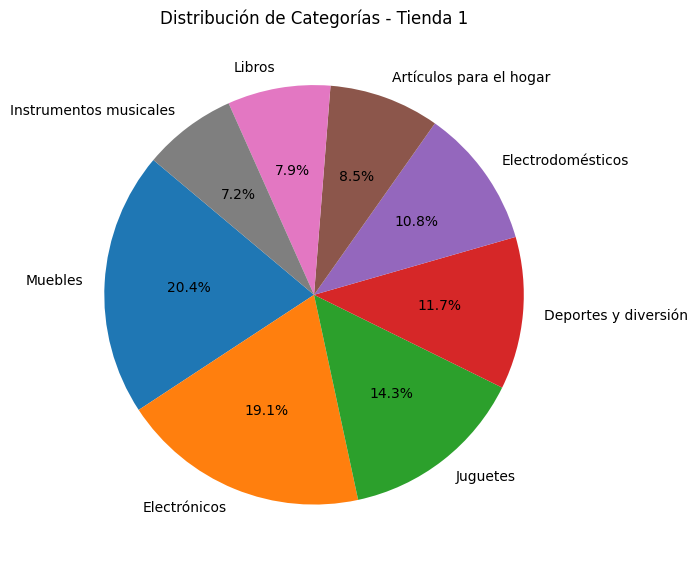

In [35]:
# Analizando categor√≠as por tienda (por ejemplo, Tienda 1)
df_t1 = pd.read_csv(url)
categorias = df_t1['Categor√≠a del Producto'].value_counts()

# Gr√°fico
plt.figure(figsize=(7, 7))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuci√≥n de Categor√≠as - Tienda 1')
plt.tight_layout()
plt.show()

# **Informe Final**

üìä Informe Final de An√°lisis de Tiendas para Decisi√≥n de Venta üß≠ Introducci√≥n El objetivo de este an√°lisis es determinar cu√°l de las cuatro tiendas disponibles representa la mejor oportunidad de venta para el Sr. Juan, considerando m√∫ltiples factores clave que afectan el rendimiento comercial. Para ello, se han recopilado y procesado datos de ventas, calificaciones de clientes y log√≠stica de env√≠o de cada tienda. Con base en estos datos, se han generado visualizaciones que permiten obtener insights y facilitar la toma de decisiones informadas.

üìà Desarrollo del An√°lisis

Ingresos Totales por Tienda A trav√©s de la suma de los valores de ventas (Precio), se identificaron los ingresos generados por cada tienda. El gr√°fico de barras evidenci√≥ que:
Tienda 2 fue la que gener√≥ mayores ingresos totales, seguida por Tienda 4.

Tienda 3 mostr√≥ los ingresos m√°s bajos.

üëâ Esto sugiere que Tienda 2 tiene una fuerte actividad comercial y un volumen de ventas elevado.

Distribuci√≥n de Categor√≠as de Productos Vendidos Se gener√≥ un gr√°fico de torta para visualizar las categor√≠as m√°s vendidas. Se observaron patrones distintos:
Tienda 1 y Tienda 4 mostraron una mayor diversificaci√≥n de productos.

Tienda 3 tuvo alta concentraci√≥n en pocas categor√≠as.

üëâ La variedad en las tiendas puede atraer a m√°s clientes y mejorar la rentabilidad por categor√≠a.

Calificaciones Promedio de los Clientes Las calificaciones promedio mostraron la satisfacci√≥n del cliente en cada tienda. Los resultados fueron:
Tienda 4 obtuvo la mayor calificaci√≥n promedio, lo que indica un buen nivel de servicio y calidad.

Tienda 2, aunque con altos ingresos, present√≥ una calificaci√≥n menor que podr√≠a reflejar problemas de postventa o calidad.

üëâ La percepci√≥n del cliente es clave para la sostenibilidad de la venta en el largo plazo.

Productos M√°s y Menos Vendidos Se identificaron los 5 productos m√°s vendidos y menos vendidos por tienda:
Tienda 2 y Tienda 1 concentraron sus ventas en productos de alto valor.

Tienda 3 mostr√≥ baja rotaci√≥n general.

Tienda 4 tuvo un mix equilibrado entre productos populares y productos de baja rotaci√≥n.

üëâ Esto indica que Tienda 4 tiene una gesti√≥n de inventario m√°s saludable.

Costo de Env√≠o Promedio por Tienda Finalmente, se analizaron los costes log√≠sticos:
Tienda 3 tuvo el costo de env√≠o m√°s alto, lo cual reduce el margen de ganancia.

Tienda 1 y Tienda 4 mantuvieron costos de env√≠o promedio bajos, favoreciendo su rentabilidad.

‚úÖ Conclusi√≥n y Recomendaci√≥n Final Tras analizar todos los factores, se recomienda que el Sr. Juan elija vender en la Tienda 4. Esta decisi√≥n se fundamenta en los siguientes puntos clave:

Posee altas calificaciones de clientes, lo que asegura buena experiencia y fidelizaci√≥n.

Mantiene ingresos s√≥lidos, sin ser la m√°s baja ni la m√°s alta, lo que sugiere un flujo de ventas constante.

Tiene costos de env√≠o controlados, lo que mejora el margen de utilidad.

Presenta una distribuci√≥n equilibrada de categor√≠as y una buena mezcla entre productos m√°s y menos vendidos.

Si bien Tienda 2 mostr√≥ los ingresos m√°s altos, sus calificaciones bajas y posible dependencia de pocos productos representan un riesgo a mediano plazo. Tienda 3, por otro lado, presenta debilidades en casi todos los aspectos analizados.

üìå Recomendaci√≥n Estrat√©gica Priorizar el canal de venta en Tienda 4.

Mantener vigilancia en la rotaci√≥n de productos menos vendidos para ajustar stock.

Evaluar oportunidades de crecimiento en categor√≠as mejor posicionadas.

# **EXTRA**

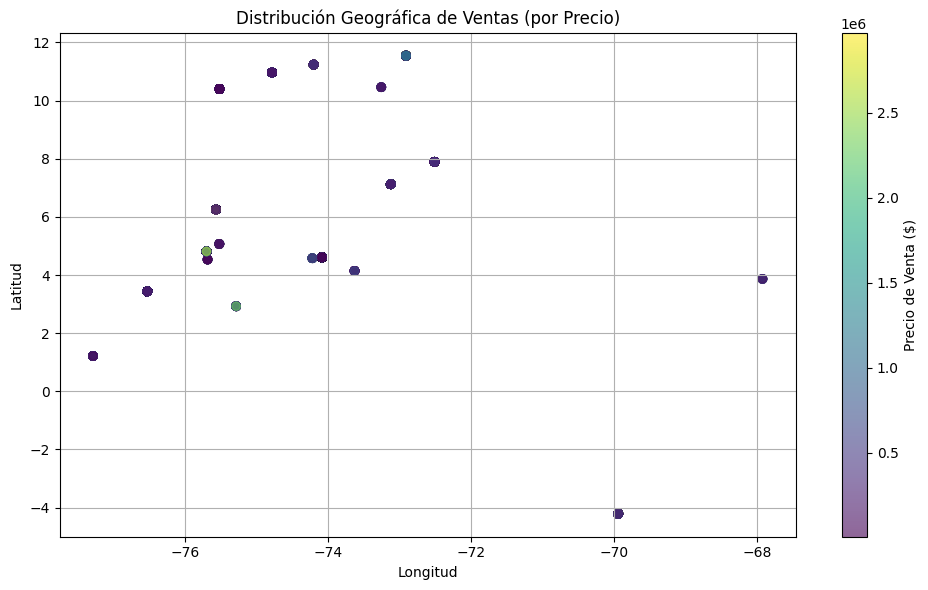

In [36]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_total['lon'], df_total['lat'],
                      c=df_total['Precio'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Precio de Venta ($)')
plt.title('Distribuci√≥n Geogr√°fica de Ventas (por Precio)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()

Con este mapa podemos interactuar con la densidad de ventas por ubicaci√≥n y ver zonas calientes üü°üü†üî¥.

In [37]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en promedio de coordenadas
mapa = folium.Map(location=[df_total['lat'].mean(), df_total['lon'].mean()], zoom_start=6)

# Crear lista de puntos para heatmap
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_total.iterrows()]

# A√±adir heatmap al mapa
HeatMap(heat_data, radius=15).add_to(mapa)

# Mostrar mapa
mapa